In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("weatherAUS.csv")

In [22]:
df.shape

(145460, 23)

In [23]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [24]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [25]:
target = df["RainTomorrow"]
target.shape

(145460,)

In [26]:
target = target.dropna()
target.unique()

array(['No', 'Yes'], dtype=object)

In [27]:
features = df[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
               'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
               'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
               'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
               'Temp3pm', 'RainToday']]

features.shape

(145460, 22)

In [28]:
features.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
dtype: object

In [29]:
# Crie uma cópia do DataFrame original para evitar o SettingWithCopyWarning
features_c = features.copy()

# Converta a coluna Date para datetime
features_c['Date'] = pd.to_datetime(features_c['Date'], errors='coerce')

# Verifique se houve algum NaT após a conversão
if features_c['Date'].isnull().any():
    print("Existem valores não convertidos em 'Date':")
    print(features_c[features_c['Date'].isnull()])  # Mostre as linhas com NaT

# Adicionando as novas colunas se a conversão for bem-sucedida
if not features_c['Date'].isnull().any():
    features_c['Year'] = features_c['Date'].dt.year
    features_c['Month'] = features_c['Date'].dt.month
    features_c['Day'] = features_c['Date'].dt.day
    features_c['DayOfWeek'] = features_c['Date'].dt.dayofweek

    # Remova a coluna Date se não for mais necessária
    features_c = features_c.drop(columns=['Date'])
else:
    print("Não foi possível adicionar as colunas porque existem valores NaT.")

In [30]:
features_c["RainToday"].describe()

count     142199
unique         2
top           No
freq      110319
Name: RainToday, dtype: object

In [31]:
features_c['RainToday'] = features_c['RainToday'].map({'Yes': 1, 'No': 0})

In [32]:
features_c = pd.get_dummies(features_c, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], drop_first=True)

In [33]:
features_c.dtypes

MinTemp           float64
MaxTemp           float64
Rainfall          float64
Evaporation       float64
Sunshine          float64
                   ...   
WindDir3pm_SSW       bool
WindDir3pm_SW        bool
WindDir3pm_W         bool
WindDir3pm_WNW       bool
WindDir3pm_WSW       bool
Length: 114, dtype: object

In [34]:
target = target.map({'Yes': 1, 'No': 0})
target.value_counts()

RainTomorrow
0    110316
1     31877
Name: count, dtype: int64

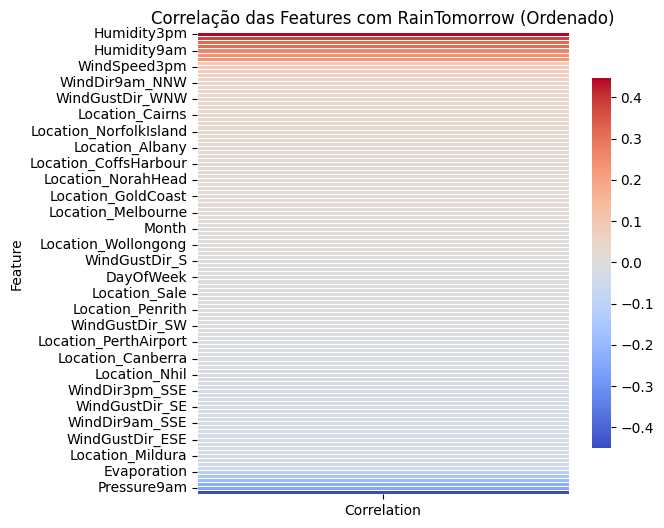

In [35]:
# Adicionando a variável target ao DataFrame de features
features_c['RainTomorrow'] = target

# Calculando a correlação apenas com a variável target
correlation_with_target = features_c.corr()['RainTomorrow'].drop('RainTomorrow')

# Criando um DataFrame para o heatmap e ordenando pela correlação
correlation_df = correlation_with_target.to_frame().reset_index()
correlation_df.columns = ['Feature', 'Correlation']

# Ordenando pela correlação
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

# Criando o heatmap sem números
plt.figure(figsize=(6, 6))  # Define o tamanho da figura
sns.heatmap(correlation_df.set_index('Feature'), annot=False, cmap='coolwarm', 
            linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Correlação das Features com RainTomorrow (Ordenado)')
plt.show()